# Problem Statement : Build machine learning model to make clusters based on different features like quality Gender, Chain_smoker, HighBP, Obese, Diabetes, Consumes_other_tobacco_products etc.

# Import required libraries

In [1]:
import pandas as pd  # For data analysis
import numpy as np  # For data analysis
import matplotlib.pyplot as plt  # For data visualization
%matplotlib inline
import seaborn as sns  # For data visualization
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans  # For clustering in machine learning

# Setting Path

In [2]:
cd C:\Data Science Docs\Python Docs\Python ML Projects\Project 11

C:\Data Science Docs\Python Docs\Python ML Projects\Project 11


# Data Exploration and Pre-processing

Load dataset

In [3]:
df = pd.read_csv('cardiac.csv')
df.head()

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness,UnderRisk
0,1,1,1,0,1,0,0,0,1,0,0,0,no
1,1,0,1,0,1,0,0,0,1,0,0,0,no
2,1,0,1,0,1,0,0,0,1,0,0,0,no
3,1,0,1,0,1,0,0,0,1,0,0,0,no
4,1,0,0,0,0,0,1,1,0,0,0,0,no


Check null values

In [4]:
df.isnull().sum()

Gender                             0
Chain_smoker                       0
Consumes_other_tobacco_products    0
HighBP                             0
Obese                              0
Diabetes                           0
Metabolic_syndrome                 0
Use_of_stimulant_drugs             0
Family_history                     0
History_of_preeclampsia            0
CABG_history                       0
Respiratory_illness                0
UnderRisk                          0
dtype: int64

Print information about dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Gender                           889 non-null    int64 
 1   Chain_smoker                     889 non-null    int64 
 2   Consumes_other_tobacco_products  889 non-null    int64 
 3   HighBP                           889 non-null    int64 
 4   Obese                            889 non-null    int64 
 5   Diabetes                         889 non-null    int64 
 6   Metabolic_syndrome               889 non-null    int64 
 7   Use_of_stimulant_drugs           889 non-null    int64 
 8   Family_history                   889 non-null    int64 
 9   History_of_preeclampsia          889 non-null    int64 
 10  CABG_history                     889 non-null    int64 
 11  Respiratory_illness              889 non-null    int64 
 12  UnderRisk                        889

Describe dataset in statistic form

In [6]:
df.describe()

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness
count,889.000000,889.000000,889.00000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,1.258718,0.120360,0.83802,0.086614,0.919010,0.055118,0.042745,0.082115,0.925759,0.017998,0.021372,0.032621
std,0.500557,0.325565,0.36864,0.281427,0.272973,0.228339,0.202395,0.274694,0.262310,0.133018,0.144704,0.177742
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,2.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Drop under risk column

In [7]:
df.drop(['UnderRisk'],axis=1,inplace=True)
df.head()

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness
0,1,1,1,0,1,0,0,0,1,0,0,0
1,1,0,1,0,1,0,0,0,1,0,0,0
2,1,0,1,0,1,0,0,0,1,0,0,0
3,1,0,1,0,1,0,0,0,1,0,0,0
4,1,0,0,0,0,0,1,1,0,0,0,0


# Working with models

Apply Kmean clustering on dataset

In [8]:
KM = KMeans(n_clusters=2)

In [9]:
KM.fit(df)

KMeans(n_clusters=2)

Print cluster centers

In [10]:
KM.cluster_centers_

array([[9.58925750e-01, 1.43759874e-01, 8.10426540e-01, 9.63665087e-02,
        9.14691943e-01, 6.63507109e-02, 5.21327014e-02, 8.53080569e-02,
        9.19431280e-01, 2.52764613e-02, 2.68562401e-02, 3.00157978e-02],
       [2.00000000e+00, 6.25000000e-02, 9.06250000e-01, 6.25000000e-02,
        9.29687500e-01, 2.73437500e-02, 1.95312500e-02, 7.42187500e-02,
        9.41406250e-01, 1.04083409e-17, 7.81250000e-03, 3.90625000e-02]])

Create column cluster for predicted labels value

In [11]:
cluster = KM.fit_predict(df)

In [12]:
df['Label'] = cluster
df.head()

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness,Label
0,1,1,1,0,1,0,0,0,1,0,0,0,1
1,1,0,1,0,1,0,0,0,1,0,0,0,1
2,1,0,1,0,1,0,0,0,1,0,0,0,1
3,1,0,1,0,1,0,0,0,1,0,0,0,1
4,1,0,0,0,0,0,1,1,0,0,0,0,1


Show a silhouette score

In [13]:
from sklearn.metrics import silhouette_score

In [14]:
silhouette_score(df,cluster)

0.4981285637165637

Plot the hierarchical clustering using scipy

In [15]:
from scipy.cluster.hierarchy import linkage,dendrogram

In [16]:
df.drop(['Label'],axis=1,inplace=True)
df.head()

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness
0,1,1,1,0,1,0,0,0,1,0,0,0
1,1,0,1,0,1,0,0,0,1,0,0,0
2,1,0,1,0,1,0,0,0,1,0,0,0
3,1,0,1,0,1,0,0,0,1,0,0,0
4,1,0,0,0,0,0,1,1,0,0,0,0


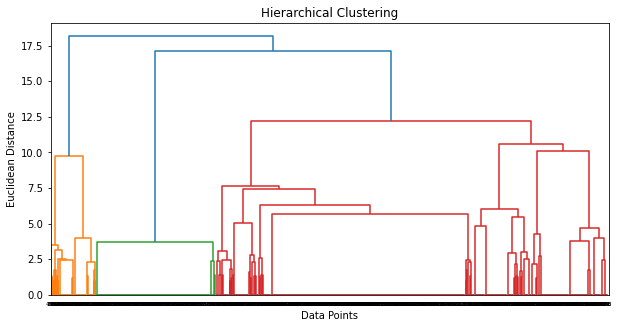

In [17]:
plt.figure(figsize=(10,5))
# The following linkage methods are used to compute the distance between two clusters 
# method='ward' uses the Ward variance minimization algorithm
merge = linkage(df,method='ward')
# Plot the hierarchical clustering as a dendrogram.
# leaf_rotation : double, optional Specifies the angle (in degrees) to rotate the leaf labels.
dendrogram(merge,leaf_rotation=0)
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.title('Hierarchical Clustering')
plt.show()

Apply Agglomerative Clustering using number of clusters

In [18]:
from sklearn.cluster import AgglomerativeClustering

In [19]:
HC = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')

In [20]:
hc_cluster = HC.fit_predict(df)

Create label column for predicted cluster label

In [21]:
df['Label'] = hc_cluster
df.head()

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness,Label
0,1,1,1,0,1,0,0,0,1,0,0,0,0
1,1,0,1,0,1,0,0,0,1,0,0,0,0
2,1,0,1,0,1,0,0,0,1,0,0,0,0
3,1,0,1,0,1,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,1,0,0,0,0,1


Show label counts

In [22]:
df.Label.value_counts()

0    817
1     72
Name: Label, dtype: int64

Show a silhouette score

In [23]:
silhouette_score(df,hc_cluster)

0.5390208253186523